In [7]:
import numpy as np
import random as random

def nondominated2Dset(lower, upper, count):
    #Initilize the initial available zone with lower and upper
    availables = np.array([
            [lower ,upper,lower,upper]
        ])
    
    while availables.size/4<count:        
        #generate randomized x between lower and upper
        x=randFromInterval(lower, upper)
        
        #search for the available zone for that x
        currentZone=np.where(np.logical_and(availables[:,0]<x , availables[:,1]>x))
        
        #generate y between the available y-values (from the current zone)
        y=randFromInterval(availables[currentZone,2],availables[currentZone,3] )
        
        #update the available zones. the new values x,y updates the current zone 
        availables_new= np.array([
            [availables[currentZone,0][0][0] ,x,y,availables[currentZone,3][0][0]],                
            [x,availables[currentZone,1][0][0] ,availables[currentZone,2][0][0],y]
        ])
        
        availables = np.delete(availables, (currentZone), axis=0)
        
        #add news availables to availables zones
        availables=np.concatenate((availables,availables_new ))
    
    return availables[:,1:3]
    
def randFromInterval(lower, upper):
    x=random.uniform(lower, upper)
    return x

In [8]:
#generacion de una frontera de pareto
import numpy as np
import random as random

def nondominated3Dset(lower, upper, count):
    #Set a first random point
    points = np.array([[randFromOpenInterval(lower, upper),
                        randFromOpenInterval(lower, upper),
                        randFromOpenInterval(lower, upper)] ])
   
    while points.size/3<count:     
        #generate randomized x and y
        x=randFromOpenInterval(lower, upper)
        y=randFromOpenInterval(lower, upper)
    
        #check if it does not exist a point with P(x,y,-)
        equal=np.where(np.logical_and(points[:,0]==x , points[:,1]==y))
        if len(equal) <= 1:
            
            #Get all points that could dominate P(x,y,-) (points with greater x and y)
            down=np.where(np.logical_and(points[:,0]>x , points[:,1]>y))
            #Get all points that could be dominated by P(x,y,-) (points with lower x and y)
            up=np.where(np.logical_and(points[:,0]<x , points[:,1]<y))
            
            #obtain lower and greater posible values for z so that P(x,y,z) does not dominate and is not dominated
            if points[down].size>0:
                z_lower=np.maximum.reduce(points[down, 2][0])
            else:
                z_lower= lower
                
            if points[up].size>0:
                z_upper=np.minimum.reduce(points[up, 2][0])
            else:
                z_upper= upper
        
            #generate z within posible values 
            z=randFromOpenInterval(z_lower,z_upper)
           
            #add new point P(x,y,z)
            nuevo= np.array([[x,y,z]])
            items=int(points.size/3+1)
            points=np.append(points, nuevo).reshape(items,3)
    
    return points
    
def randFromOpenInterval(lower, upper):
    x=random.uniform(np.nextafter(lower, upper), np.nextafter(upper, lower))
    return x

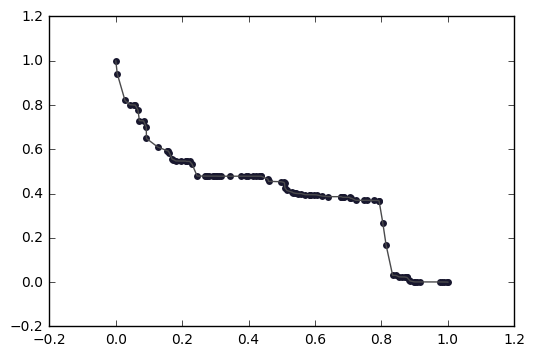

In [9]:
#Example 2D
import matplotlib.pyplot as plt
%matplotlib inline

dataset=nondominated2Dset(0,1,100)

fig = plt.figure("2D_data")
plt.scatter(dataset[:,0],dataset[:,1], c='#18172E',lw = 0,marker=".", s=100)

idx_sort=np.argsort(dataset[:,0])
ordered=dataset[idx_sort]
plt.plot(ordered[:,0],ordered[:,1], c='#4A4A4C')
plt.show()
    


<IPython.core.display.Javascript object>


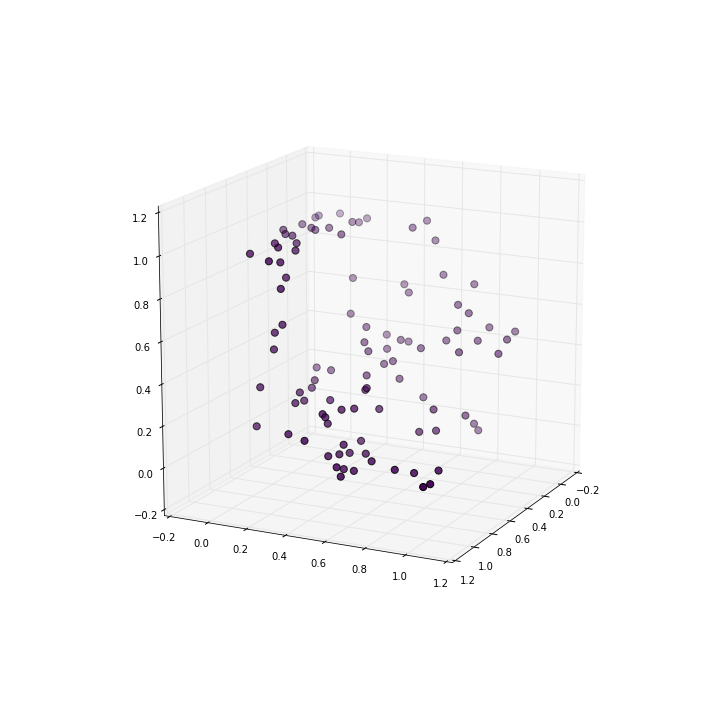

<function matplotlib.pyplot.show>

In [10]:
#Example 3D
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

dataset= nondominated3Dset(0,1,100)
fig = plt.figure("3D_data",figsize=(10,10))
ax = fig.gca(projection='3d')     
ax.scatter(dataset[:,0],dataset[:,1],dataset[:,2], c=[0.271305, 0.019942, 0.347269], s=50)
plt.show